This notebook aim on exploring DDI Match data from 2013 to 2019

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing and understanding data

In [2]:
odi=pd.read_csv("ODI_Match_Totals.csv")
odi

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,549,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7
1292,979,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1
1293,1296,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40
1294,550,193/6,31.5,6.06,352.0,2,-,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7


Unnamed column show index of the row but we don't need it so let's drop it. 

In [3]:
odi=odi.drop('Unnamed: 0',axis=1)
odi

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7
1292,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1
1293,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40
1294,193/6,31.5,6.06,352.0,2,-,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7


In [4]:
odi.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [5]:
odi.describe()

,Overs,Target,Inns,Country_ID
count,1296.000000,620.000000,1296.000000,1296.000000
mean,43.087423,253.440323,1.462963,8.553241
std,10.632343,70.004394,0.528875,10.330236
min,0.000000,68.000000,0.000000,1.000000
25%,40.200000,208.750000,1.000000,3.000000
50%,48.200000,258.000000,1.000000,5.000000
75%,50.000000,301.000000,2.000000,8.000000
max,50.000000,482.000000,2.000000,40.000000


In [6]:
odi.Country.unique() # Finding all the countries in the list

array(['Pakistan', 'India', 'SriLanka', 'Australia', 'England',
       'SouthAfrica', 'Newzealad', 'WestIndies', 'Afghanistan',
       'Bangladesh'], dtype=object)

In [7]:
len(odi.Ground.unique()) # Number of total grounds

94

# Exploring and Plotting data

## Highest Wins

 Finding which team has the highest wins/loss ratio

In [8]:
odi1=odi.loc[odi.Result.isin(['lost','won'])]  # Taking row only win and loss drop all other results
odi1


,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1288,294/4,43.0,6.83,293.0,2,won,v Ireland,Dublin,15 May 2019,ODI # 4136,Bangladesh,25
1289,152/1,24.0,6.33,NaN,1,lost,v Bangladesh,Dublin (Malahide),17 May 2019,ODI # 4137,WestIndies,4
1290,213/5,22.5,9.32,210.0,2,won,v West Indies,Dublin (Malahide),17 May 2019,ODI # 4137,Bangladesh,25
1291,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7


In [9]:
odi1["Country"].unique()   # list of teams 

array(['Pakistan', 'India', 'SriLanka', 'Australia', 'England',
       'SouthAfrica', 'Newzealad', 'WestIndies', 'Afghanistan',
       'Bangladesh'], dtype=object)

In [10]:
coun_res=odi1[["Country","Result"]] # Including only required data
coun_res

,Country,Result
0,Pakistan,won
1,India,lost
2,Pakistan,lost
3,India,won
4,SriLanka,lost
...,...,...
1288,Bangladesh,won
1289,WestIndies,lost
1290,Bangladesh,won
1291,Pakistan,lost


In [11]:
coun_res.Result.describe() # Check out the data

count     1225
unique       2
top        won
freq       663
Name: Result, dtype: object

In [12]:
wnl=coun_res.groupby(['Country', 'Result']).Result.count() # Find the total wins and losses of each team
wnl

Country      Result
Afghanistan  lost      39
             won       46
Australia    lost      50
             won       73
Bangladesh   lost      43
             won       47
England      lost      56
             won       80
India        lost      49
             won       99
Newzealad    lost      48
             won       73
Pakistan     lost      72
             won       61
SouthAfrica  lost      49
             won       82
SriLanka     lost      87
             won       63
WestIndies   lost      69
             won       39
Name: Result, dtype: int64

In [13]:
# Finding Score of each team: Score=(total wins)/(total losses)
score=[]
for i in coun_res.Country.unique():
    temp=round(wnl[i].won/wnl[i].lost,2)
    score.append(temp)

score

[0.85, 2.02, 0.72, 1.46, 1.43, 1.67, 1.52, 0.57, 1.18, 1.09]

In [14]:
countries=coun_res.Country.unique() # Getting label data
countries   

array(['Pakistan', 'India', 'SriLanka', 'Australia', 'England',
       'SouthAfrica', 'Newzealad', 'WestIndies', 'Afghanistan',
       'Bangladesh'], dtype=object)

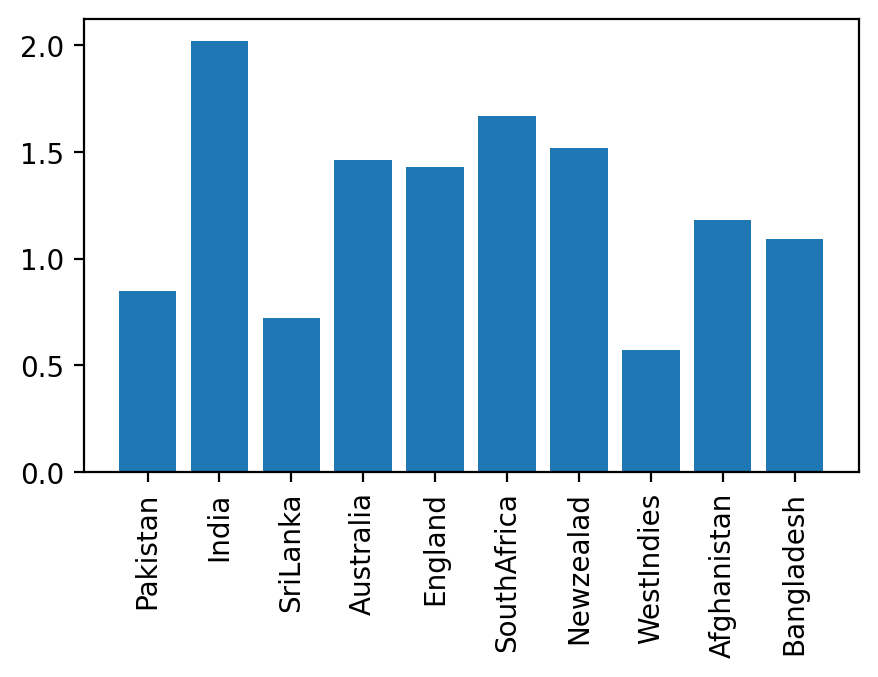

In [15]:
plt.figure(figsize=(5,3),dpi=200)
plt.bar(countries,score)
y_pos = range(len(countries))
plt.xticks(y_pos, countries, rotation=90)
plt.show()


It shows that India has the highest won/lost ratio in ODI from 2013 to 2019 with the score of 2.02 and WestIndies has the lowesst won/lost ratio with the score of 0.57 in ODI from 2013 to 2019

# Runs per over (RPO) of each country 

In [16]:
data=odi[['Country','RPO']]
data

,Country,RPO
0,Pakistan,5.15
1,India,3.43
2,Pakistan,3.21
3,India,3.82
4,SriLanka,4.95
...,...,...
1291,Pakistan,6.80
1292,England,6.88
1293,Afghanistan,3.63
1294,Pakistan,6.06


RPO contains '-' as a null placehodler so we will remove it for further calculations.

In [17]:
data.RPO.dtype

dtype('O')

In [18]:
data.RPO=pd.to_numeric(data.RPO, errors='coerce')
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Country,RPO
0,Pakistan,5.15
1,India,3.43
2,Pakistan,3.21
3,India,3.82
4,SriLanka,4.95
...,...,...
1291,Pakistan,6.80
1292,England,6.88
1293,Afghanistan,3.63
1294,Pakistan,6.06


In [19]:
# data.RPO.replace('-','0')
data.isnull().sum()

Country     0
RPO        20
dtype: int64

In [20]:
meann=data.RPO.mean()
data.RPO.fillna(meann,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
round(data.groupby('Country').mean(),2)

,RPO
Country,
Afghanistan,4.73
Australia,5.73
Bangladesh,5.29
England,5.87
India,5.62
Newzealad,5.80
Pakistan,5.27
SouthAfrica,5.69
SriLanka,5.32


It shows that England has the highest RPO from 2013 to 2019.

### RPO distribution

In [22]:
odi

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7
1292,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1
1293,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40
1294,193/6,31.5,6.06,352.0,2,-,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7


In [24]:
countries=data.Country.unique()
countries

array(['Pakistan', 'India', 'SriLanka', 'Australia', 'England',
       'SouthAfrica', 'Newzealad', 'WestIndies', 'Afghanistan',
       'Bangladesh'], dtype=object)

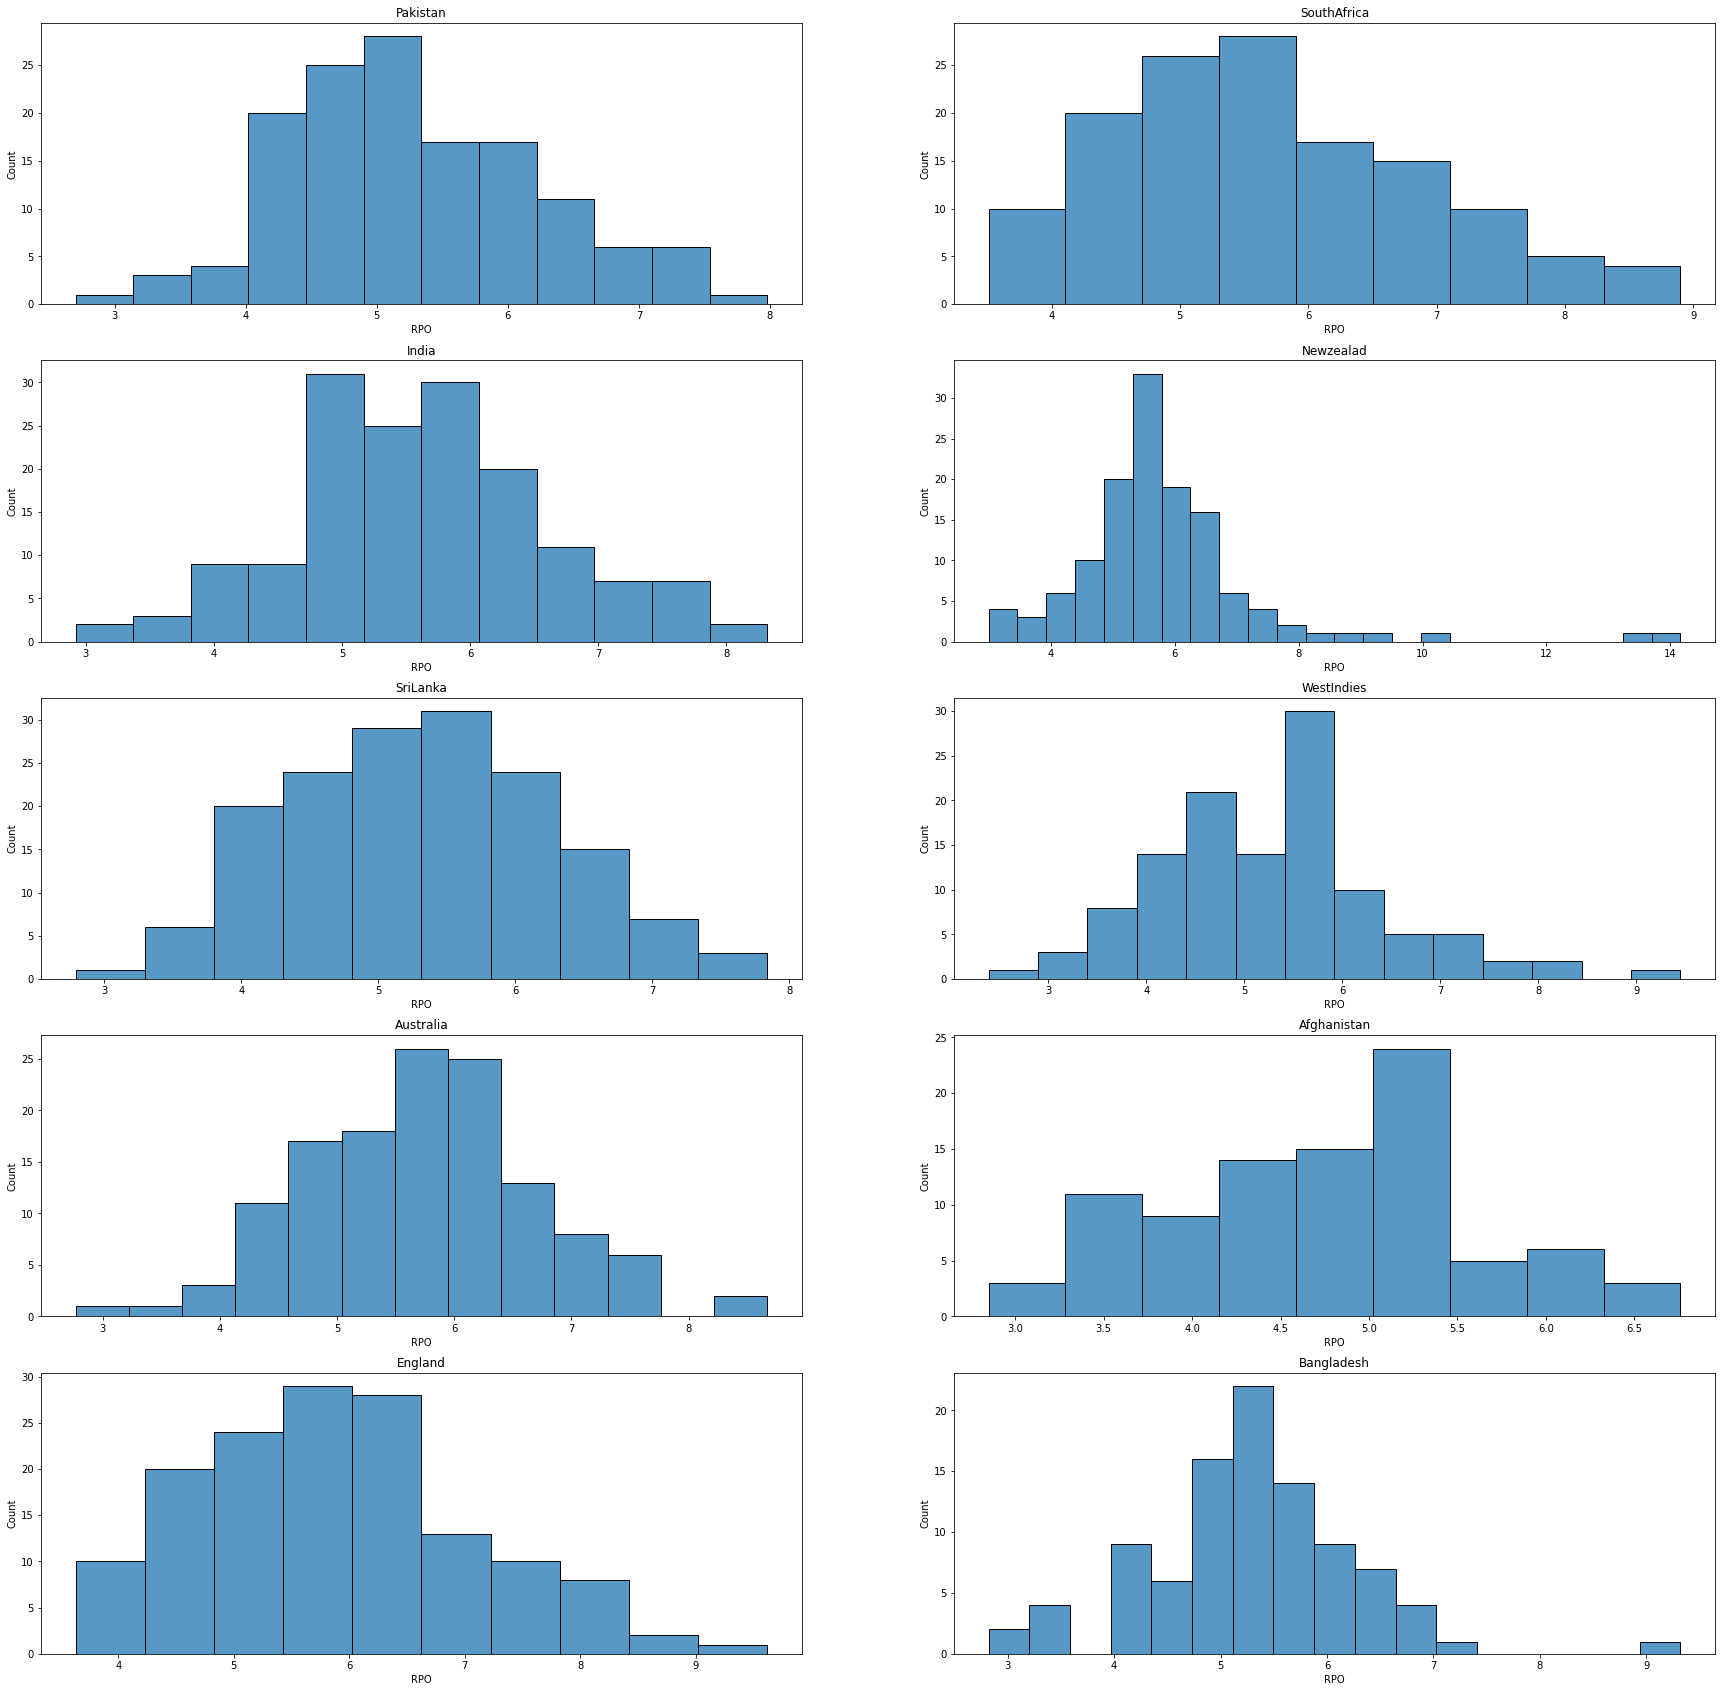

In [25]:
# sns.set()
fig, axes = plt.subplots(5, 2,figsize=(30,30))
i=1
j=1
for country in countries:
    if i>5:
        col=i-5
        row=2
    else:
        col=i
        row=1
    sns.histplot( data.loc[data.Country==country, "RPO"] ,ax=axes[col-1,row-1])
    ax=axes[col-1,row-1]
    ax.set_title(country)
    i=i+1

## Pakistan vs other countries

In [27]:
pak=odi[odi['Country']=='Pakistan']
pak

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
2,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
52,190,36.2,5.22,316.0,2,lost,v South Africa,Bloemfontein,10 Mar 2013,ODI # 3343,Pakistan,7
54,192/4,39.2,4.88,192.0,2,won,v South Africa,Centurion,15 Mar 2013,ODI # 3346,Pakistan,7
56,309,48.1,6.41,344.0,2,lost,v South Africa,Johannesburg,17 Mar 2013,ODI # 3347,Pakistan,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,80/2,19.0,4.21,NaN,1,n/r,v England,The Oval,8 May 2019,ODI # 4130,Pakistan,7
1282,361/7,50.0,7.22,374.0,2,lost,v England,Southampton,11 May 2019,ODI # 4133,Pakistan,7
1286,358/9,50.0,7.16,NaN,1,lost,v England,Bristol,14 May 2019,ODI # 4135,Pakistan,7
1291,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7


### Number of matches played against other countries

In [29]:
oppos=pak.Opposition.value_counts()
oppos

v South Africa    21
v Sri Lanka       21
v New Zealand     17
v Zimbabwe        15
v England         15
v Australia       14
v West Indies     13
v India            9
v Bangladesh       5
v Ireland          4
v Afghanistan      2
v Scotland         1
v U.A.E.           1
v Hong Kong        1
Name: Opposition, dtype: int64

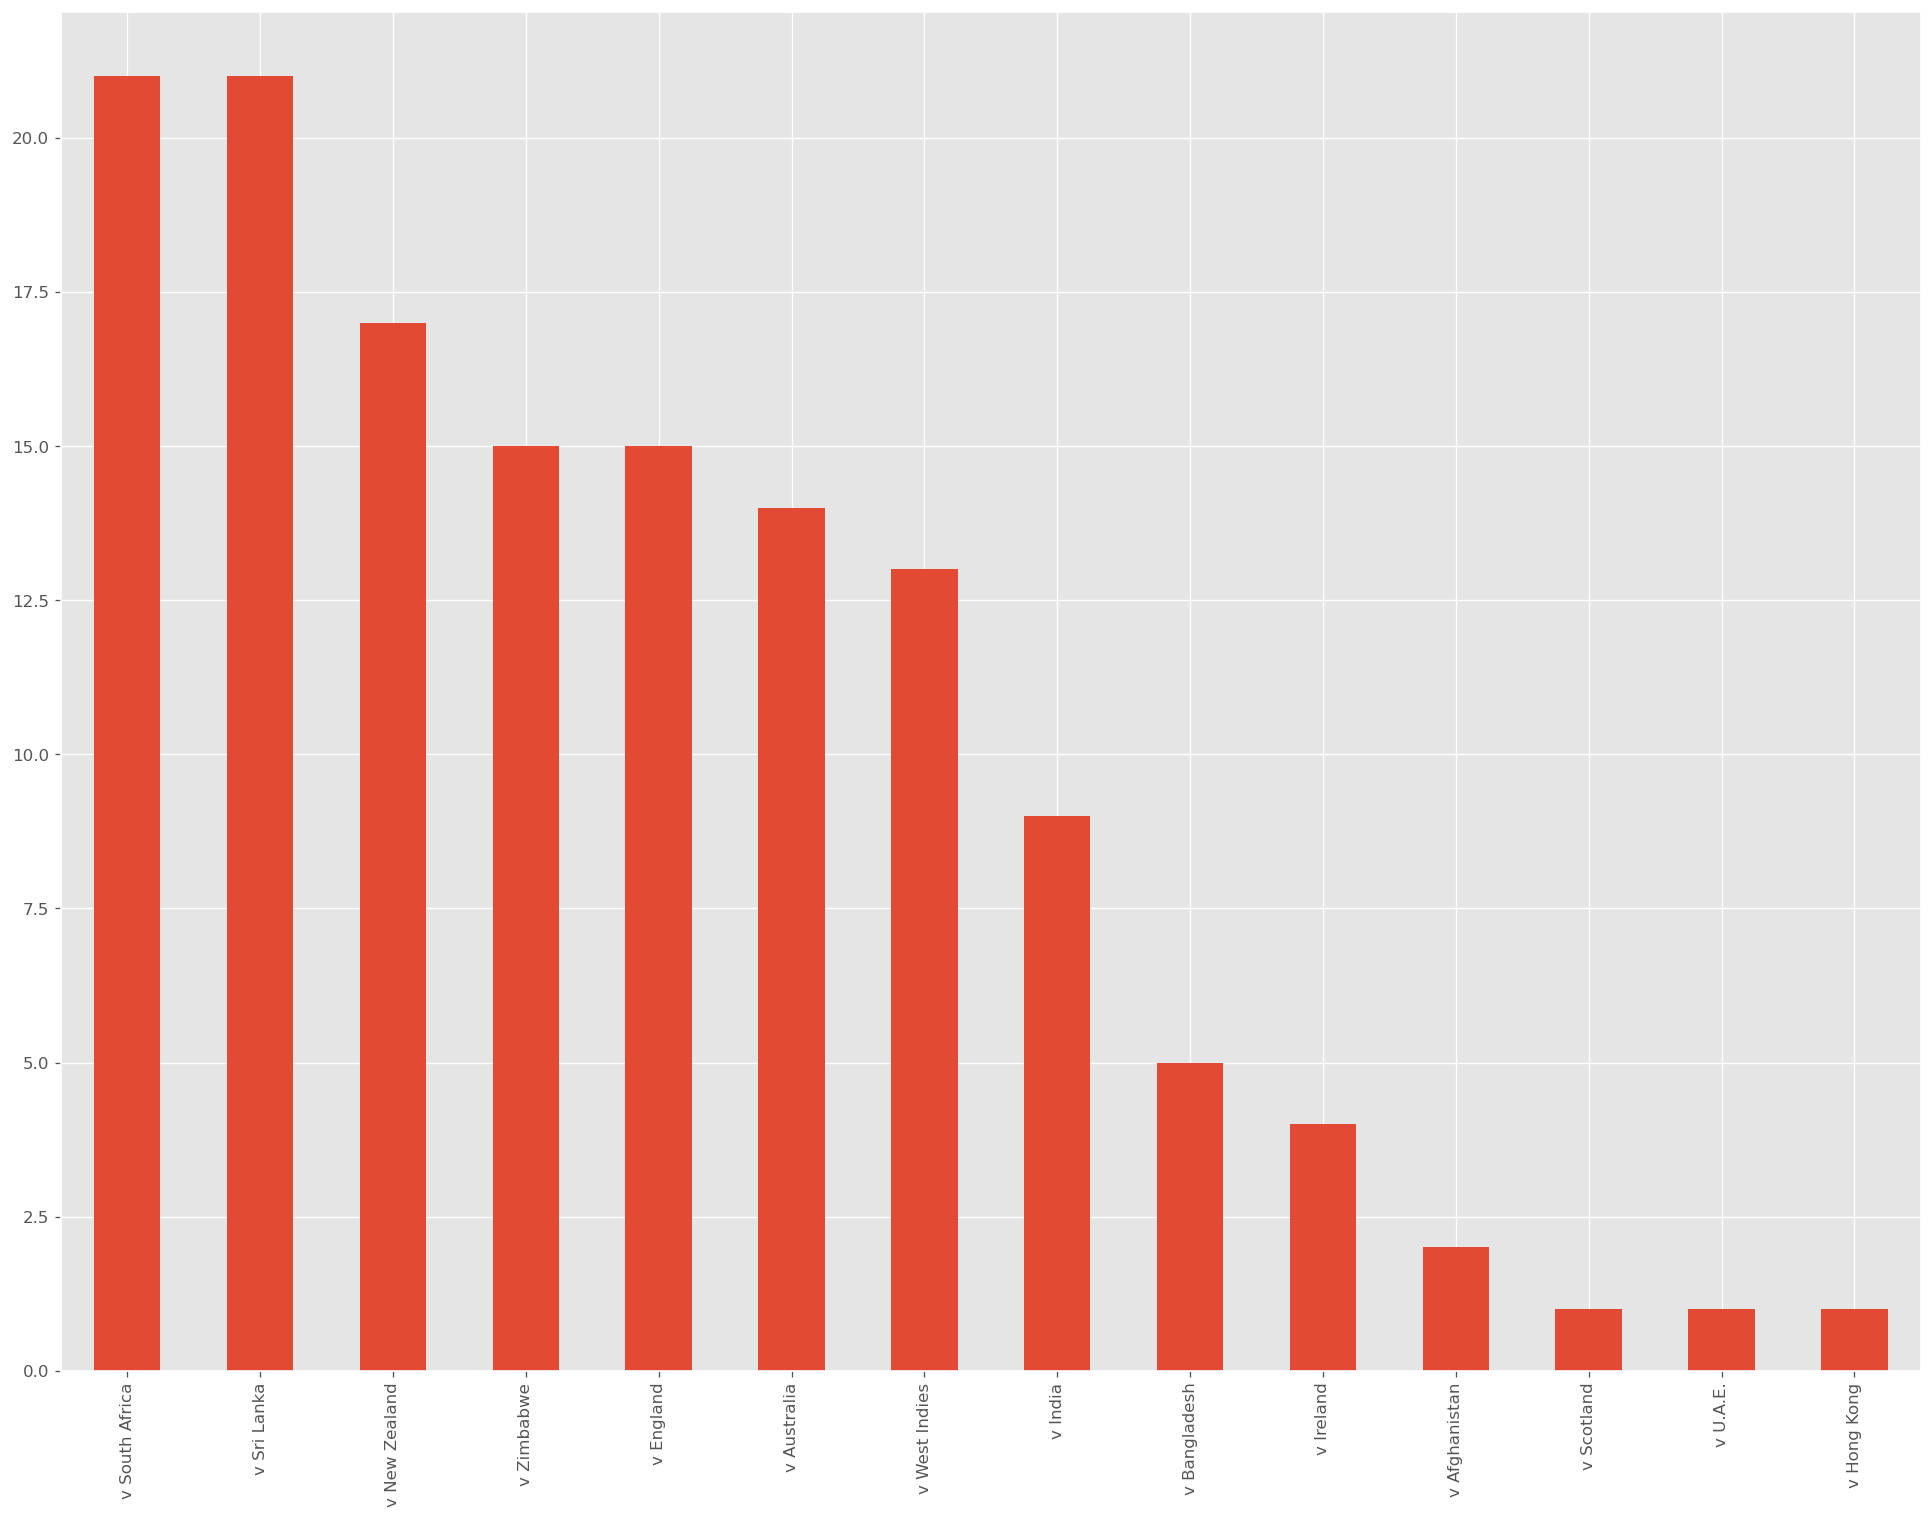

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(20,15),dpi=120)
oppos.plot.bar()
plt.show()

Highest number of games were played against south africa

This concludes our analysis, see you next time.